In [1]:
# import packages 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import time

In [2]:
# filter warnings that can be ignored
import warnings
warnings.filterwarnings('ignore')

# 1. Data Collection

In [3]:
#read dataset using read_csv() - data.csv
df = pd.read_csv("datapr.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
5686,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
5687,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
5688,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# 2. Exploring Data Analysis

In [4]:
df.shape #dimensions of the data

(5690, 32)

In [5]:
df.describe() #basic info of the dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+03,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,...,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.249217e+08,3.521260,4.297632,24.279753,351.635655,0.014053,0.052771,0.079657,0.038772,0.027393,...,4.829417,6.141394,33.575952,568.906453,0.022814,0.157212,0.208459,0.065680,0.061819,0.018047
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
df.count() #number of non null values in each column.

id                         5690
diagnosis                  5690
radius_mean                5690
texture_mean               5690
perimeter_mean             5690
area_mean                  5690
smoothness_mean            5690
compactness_mean           5690
concavity_mean             5690
concave points_mean        5690
symmetry_mean              5690
fractal_dimension_mean     5690
radius_se                  5690
texture_se                 5690
perimeter_se               5690
area_se                    5690
smoothness_se              5690
compactness_se             5690
concavity_se               5690
concave points_se          5690
symmetry_se                5690
fractal_dimension_se       5690
radius_worst               5690
texture_worst              5690
perimeter_worst            5690
area_worst                 5690
smoothness_worst           5690
compactness_worst          5690
concavity_worst            5690
concave points_worst       5690
symmetry_worst             5690
fractal_

In [7]:
df.info() #returns range, column, number of non-null objects of each column, datatype and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5690 entries, 0 to 5689
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5690 non-null   int64  
 1   diagnosis                5690 non-null   object 
 2   radius_mean              5690 non-null   float64
 3   texture_mean             5690 non-null   float64
 4   perimeter_mean           5690 non-null   float64
 5   area_mean                5690 non-null   float64
 6   smoothness_mean          5690 non-null   float64
 7   compactness_mean         5690 non-null   float64
 8   concavity_mean           5690 non-null   float64
 9   concave points_mean      5690 non-null   float64
 10  symmetry_mean            5690 non-null   float64
 11  fractal_dimension_mean   5690 non-null   float64
 12  radius_se                5690 non-null   float64
 13  texture_se               5690 non-null   float64
 14  perimeter_se            

In [8]:
df.isna() #check for null values

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5685,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5686,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isna().sum() #print the sum of null values for each columns

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In this dataset, there are no missing values.

In [10]:
df.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [11]:
df.columns|()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [12]:
df=df.drop_duplicates(subset='id' , inplace=False) #removing the duplicate values

In [13]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

# Outlier Detection and Handling

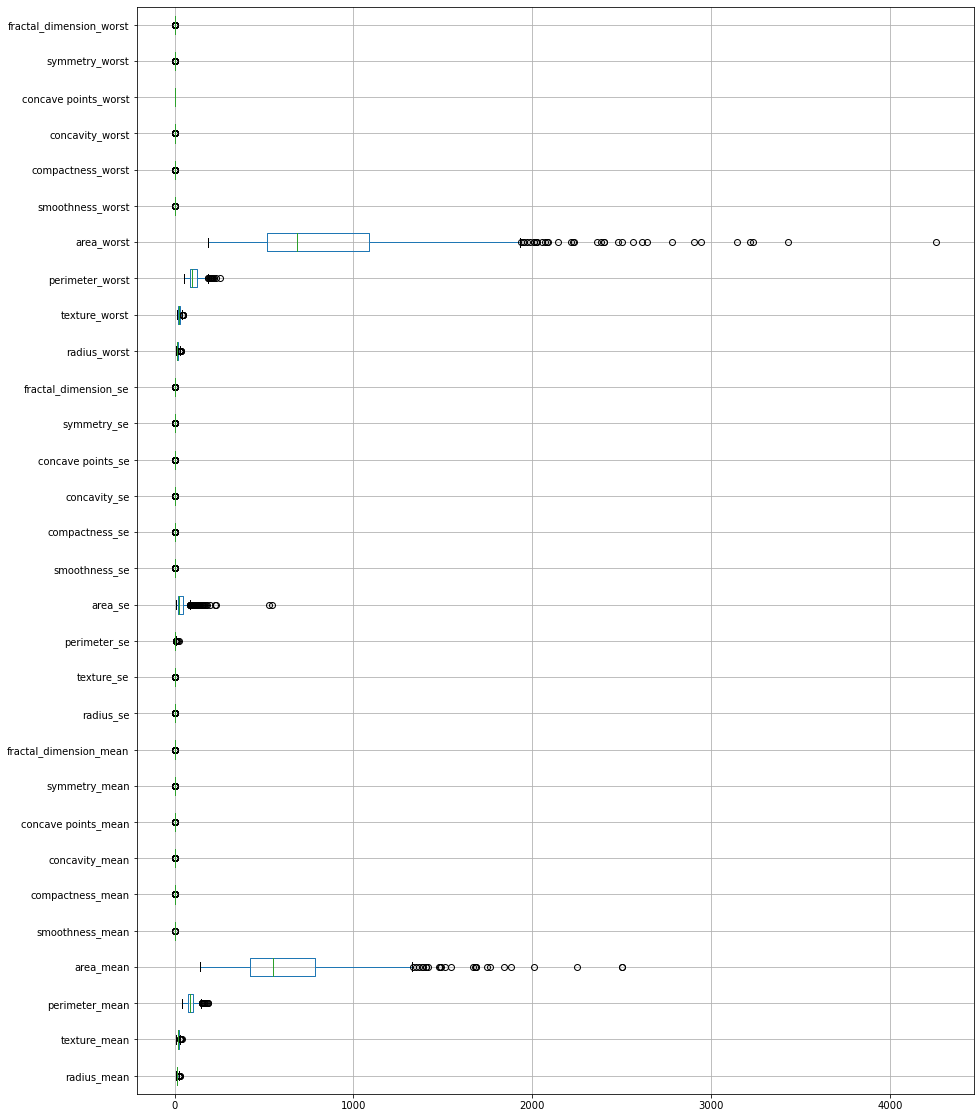

In [14]:
graph=df.select_dtypes(include=['float64'])
graph.boxplot(figsize=(15,20),vert=False)
plt.show()

In [15]:
#IQR calculation
Q1=df.quantile(.25)
Q3=df.quantile(.75)
IQR=Q3-Q1
print(((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).sum())

area_mean                  25
area_se                    65
area_worst                 35
compactness_mean           16
compactness_se             28
compactness_worst          16
concave points_mean        10
concave points_se          19
concave points_worst        0
concavity_mean             18
concavity_se               22
concavity_worst            12
diagnosis                   0
fractal_dimension_mean     15
fractal_dimension_se       28
fractal_dimension_worst    24
id                         81
perimeter_mean             13
perimeter_se               38
perimeter_worst            15
radius_mean                14
radius_se                  38
radius_worst               17
smoothness_mean             6
smoothness_se              30
smoothness_worst            7
symmetry_mean              15
symmetry_se                27
symmetry_worst             23
texture_mean                7
texture_se                 20
texture_worst               5
dtype: int64


In [16]:
for features in df.columns[2:]:
         OF_Q1=df[features].quantile(0.25)
         OF_Q2=df[features].quantile(0.50)
         OF_Q3=df[features].quantile(0.75)
         OF_IQR=OF_Q3-OF_Q1
         OF_low_limit=OF_Q1-1.5*OF_IQR
         OF_up_limit=OF_Q3+1.5*OF_IQR
         OF_outlier=df[(df[features]<OF_low_limit)|(df[features]>OF_low_limit)]
         df[features]=df[features].clip(OF_up_limit,OF_low_limit)

In [17]:
print(((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).sum())

area_mean                   0
area_se                     0
area_worst                  0
compactness_mean            0
compactness_se              0
compactness_worst           0
concave points_mean         0
concave points_se           0
concave points_worst        0
concavity_mean              0
concavity_se                0
concavity_worst             0
diagnosis                   0
fractal_dimension_mean      0
fractal_dimension_se        0
fractal_dimension_worst     0
id                         81
perimeter_mean              0
perimeter_se                0
perimeter_worst             0
radius_mean                 0
radius_se                   0
radius_worst                0
smoothness_mean             0
smoothness_se               0
smoothness_worst            0
symmetry_mean               0
symmetry_se                 0
symmetry_worst              0
texture_mean                0
texture_se                  0
texture_worst               0
dtype: int64


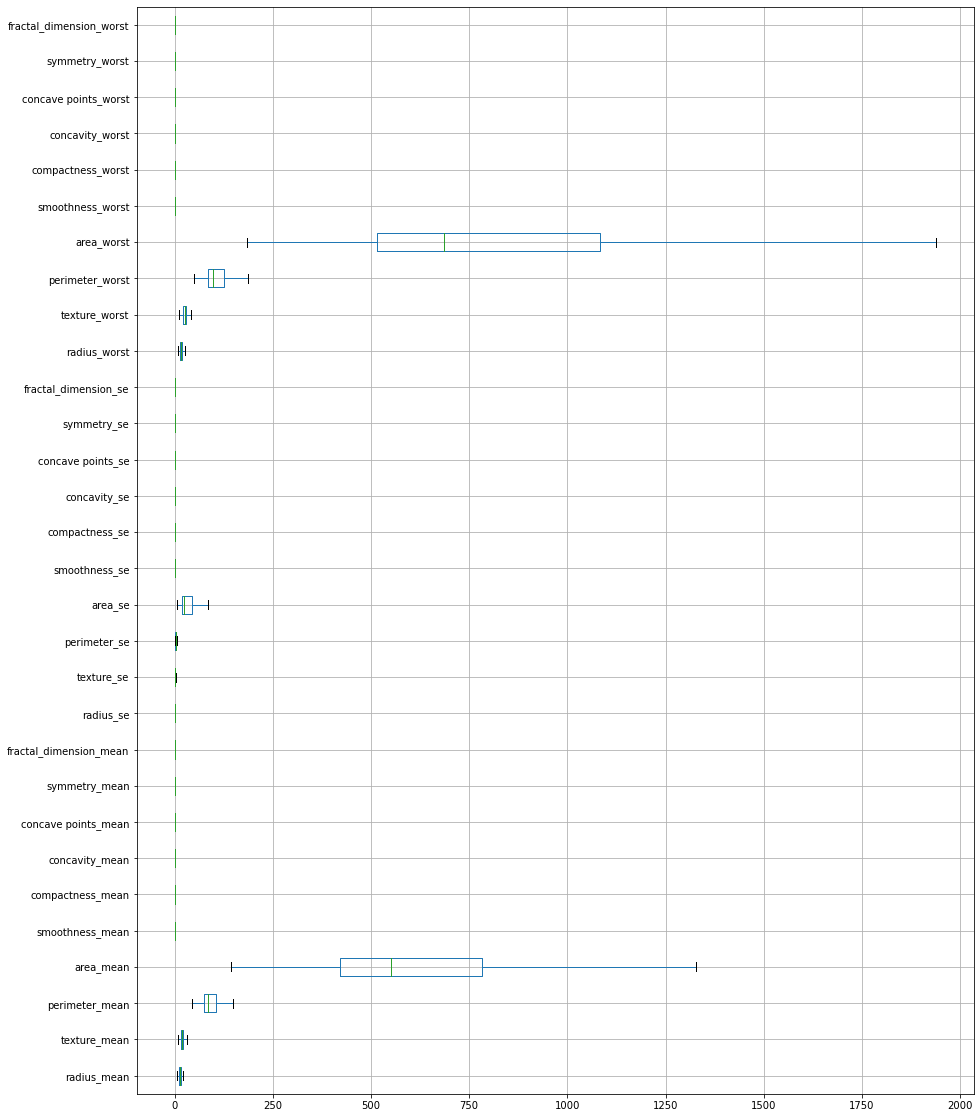

In [18]:
graph=df.select_dtypes(include=['float64'])
graph.boxplot(figsize=(15,20),vert=False)
plt.show()

All outliers were removed.

# Encoding

Now, we have one categorical feature, so we need to convert it into numeric values using LabelEncoder from sklearn.preprocessing packages

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
labelencoder_Y = LabelEncoder()
df.diagnosis = labelencoder_Y.fit_transform(df.diagnosis)

After converting into numerical values, we can check it's values using this way,

In [21]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.22862,0.28241,0.14710,...,25.38,17.33,184.6,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.8,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902


# Data Visualization

# Univariate

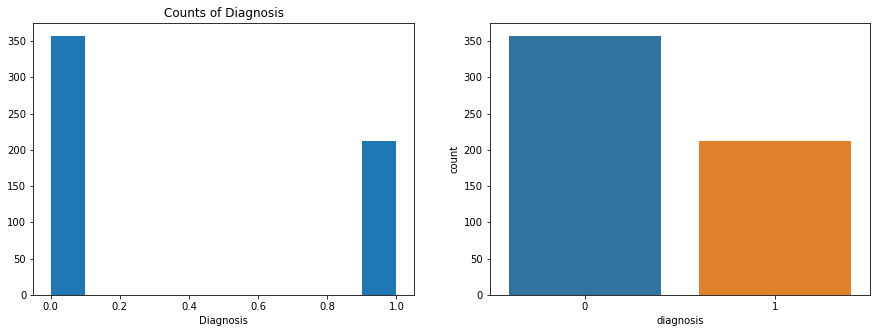

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist( df.diagnosis)
# plt.legend()
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")


plt.subplot(1, 2, 2)

sns.countplot('diagnosis', data=df);

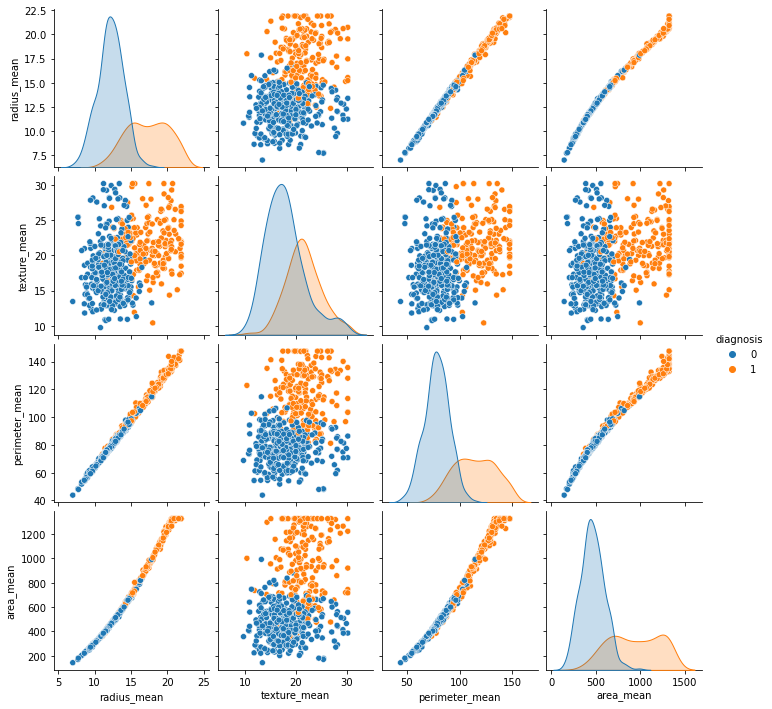

In [23]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(df[cols], hue="diagnosis")
plt.show()

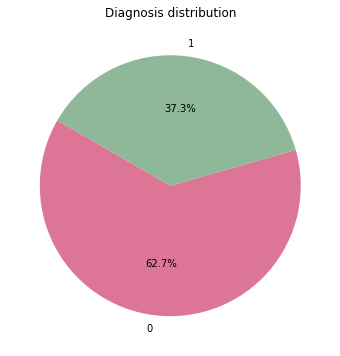

In [24]:
#piechart on Diagnosis distribution
Diagnosis_distribution =df.diagnosis.value_counts()
plt.figure(figsize=(10,6))
colors = ['#DD7596', '#8EB897']
plt.title('Diagnosis distribution')
plt.pie(Diagnosis_distribution, labels=Diagnosis_distribution.index,autopct='%1.1f%%', startangle=150,colors=colors);

# Bi-Variate

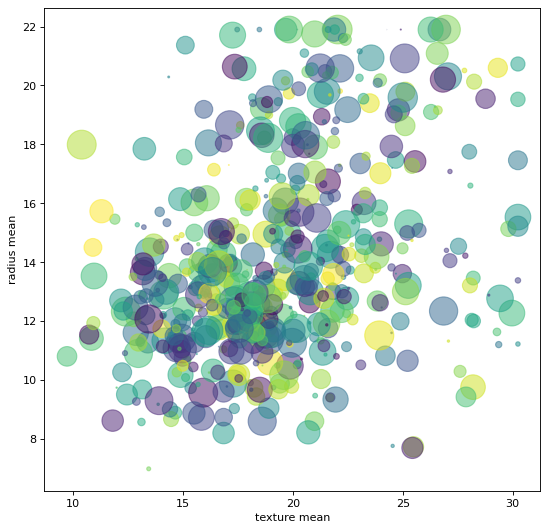

In [25]:
size = len(df['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )
plt.figure(figsize=(8, 8), dpi=80)
plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(df['texture_mean'], df['radius_mean'], s=area, c=colors, alpha=0.5);

<AxesSubplot:xlabel='area_mean', ylabel='smoothness_mean'>

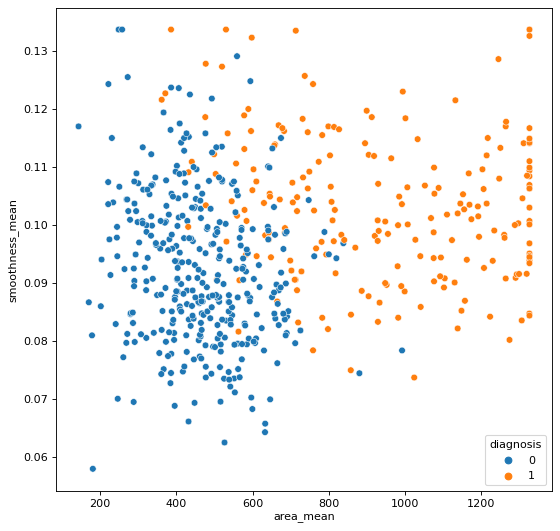

In [26]:
plt.figure(figsize=(8, 8), dpi=80)
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = df)

<AxesSubplot:xlabel='texture_mean', ylabel='smoothness_mean'>

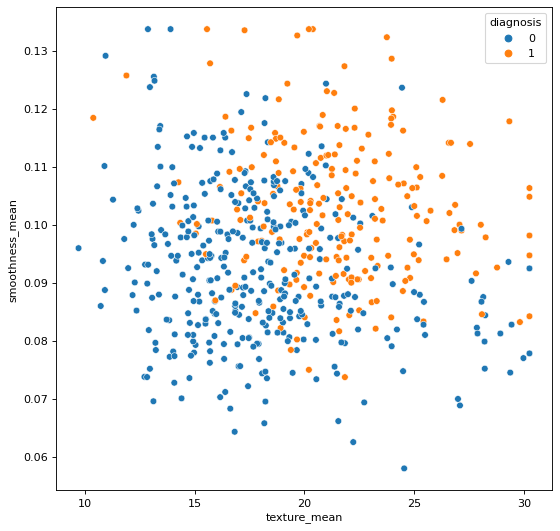

In [27]:
plt.figure(figsize=(8, 8), dpi=80)
sns.scatterplot(x = 'texture_mean', y = 'smoothness_mean', hue = 'diagnosis', data = df)

Drop unnecessary columns in a dataset

In [28]:
d_list = ['id']
df = df.drop(d_list,axis = 1 )
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.38,17.33,184.60,1937.05,0.1622,0.62695,0.7119,0.2654,0.41915,0.11890
1,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1937.05,0.1238,0.18660,0.2416,0.1860,0.27500,0.08902
2,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.00,0.1444,0.42450,0.4504,0.2430,0.36130,0.08758
3,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.91,26.50,98.87,567.70,0.1901,0.62695,0.6869,0.2575,0.41915,0.12301
4,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.00,0.1374,0.20500,0.4000,0.1625,0.23640,0.07678


In [29]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.745217,0.419123,0.759006,0.752786,0.366931,0.608494,0.727168,0.788099,0.334536,...,0.793938,0.457663,0.800618,0.794640,0.423390,0.611083,0.683565,0.793566,0.419058,0.328719
radius_mean,0.745217,1.000000,0.332760,0.997692,0.993891,0.167672,0.502741,0.674539,0.811833,0.146763,...,0.973472,0.306225,0.967506,0.962549,0.126332,0.452062,0.559312,0.747817,0.187429,0.028799
texture_mean,0.419123,0.332760,1.000000,0.339588,0.341552,-0.015997,0.241666,0.318654,0.301509,0.079586,...,0.355583,0.911642,0.364127,0.357193,0.077224,0.276731,0.308860,0.296948,0.108611,0.113049
perimeter_mean,0.759006,0.997692,0.339588,1.000000,0.991861,0.204990,0.553698,0.714624,0.841871,0.181325,...,0.974555,0.312741,0.973889,0.963900,0.157912,0.496387,0.597326,0.776769,0.212299,0.075825
area_mean,0.752786,0.993891,0.341552,0.991861,1.000000,0.167400,0.498665,0.680126,0.814133,0.155152,...,0.973784,0.311537,0.967206,0.973460,0.133605,0.441642,0.556230,0.739618,0.185220,0.033012
smoothness_mean,0.366931,0.167672,-0.015997,0.204990,0.167400,1.000000,0.661938,0.526544,0.560961,0.557597,...,0.222464,0.044550,0.246572,0.222205,0.808981,0.482407,0.446253,0.510949,0.403159,0.504675
compactness_mean,0.608494,0.502741,0.241666,0.553698,0.498665,0.661938,1.000000,0.889882,0.832541,0.588842,...,0.542776,0.250386,0.593643,0.537159,0.570701,0.883162,0.835009,0.824531,0.496061,0.710169
concavity_mean,0.727168,0.674539,0.318654,0.714624,0.680126,0.526544,0.889882,1.000000,0.928382,0.489029,...,0.702115,0.316653,0.739514,0.703992,0.462648,0.795115,0.904529,0.881502,0.414279,0.546332
concave points_mean,0.788099,0.811833,0.301509,0.841871,0.814133,0.560961,0.832541,0.928382,1.000000,0.460386,...,0.832188,0.298107,0.855906,0.830127,0.460018,0.701609,0.781051,0.916542,0.384190,0.396626
symmetry_mean,0.334536,0.146763,0.079586,0.181325,0.155152,0.557597,0.588842,0.489029,0.460386,1.000000,...,0.191455,0.099704,0.222826,0.199919,0.431536,0.478419,0.441445,0.430649,0.707566,0.451494


<AxesSubplot:>

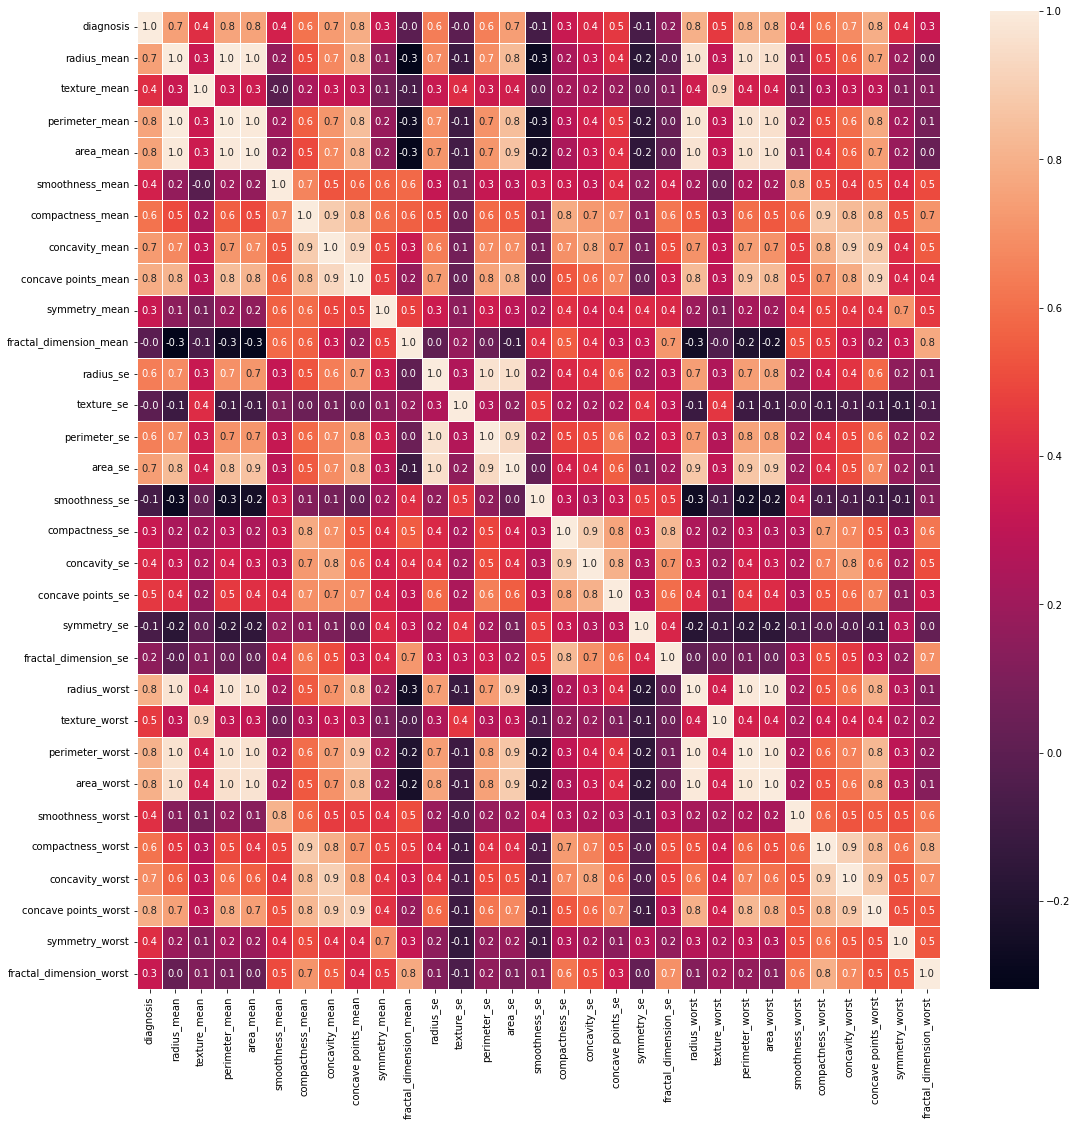

In [30]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

As it can be seen in map heat figure radius_mean, perimeter_mean and area_mean are correlated with each other so we will use only area_mean.

# Feature selection with correlation

Compactness_mean, concavity_mean and concave points_mean are correlated with each other.Therefore I only choose concavity_mean. Apart from these, radius_se, perimeter_se and area_se are correlated and I only use area_se. radius_worst, perimeter_worst and area_worst are correlated so I use area_worst. Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst. Compactness_se, concavity_se and concave points_se so I use concavity_se. texture_mean and texture_worst are correlated and I use texture_mean. area_worst and area_mean are correlated, I use area_mean.

Drop high correlated columns in a dataset

In [31]:
drop_list_cor = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst','smoothness_mean','symmetry_mean','fractal_dimension_mean','texture_se','smoothness_se','symmetry_se']
df1 = df.drop(drop_list_cor,axis = 1 )        # do not modify df, we will use it later 
df1.head(2)

,diagnosis,texture_mean,area_mean,concavity_mean,area_se,concavity_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,1001.0,0.28241,86.20,0.05373,0.006193,0.1622,0.7119,0.41915,0.11890
1,1,17.77,1326.0,0.08690,74.08,0.01860,0.003532,0.1238,0.2416,0.27500,0.08902


In [32]:
selected_feature_corr=df1.columns
fs_corr = np.ones(len(df1.columns)).astype(int)
fs_corr = DataFrame(fs_corr, columns = ["Corr"], index=df1.columns)

fs_corr

,Corr
diagnosis,1
texture_mean,1
area_mean,1
concavity_mean,1
area_se,1
concavity_se,1
fractal_dimension_se,1
smoothness_worst,1
concavity_worst,1
symmetry_worst,1


In [33]:
fs_corr = fs_corr.reset_index()

fs_corr.head()

,index,Corr
0,diagnosis,1
1,texture_mean,1
2,area_mean,1
3,concavity_mean,1
4,area_se,1


<AxesSubplot:>

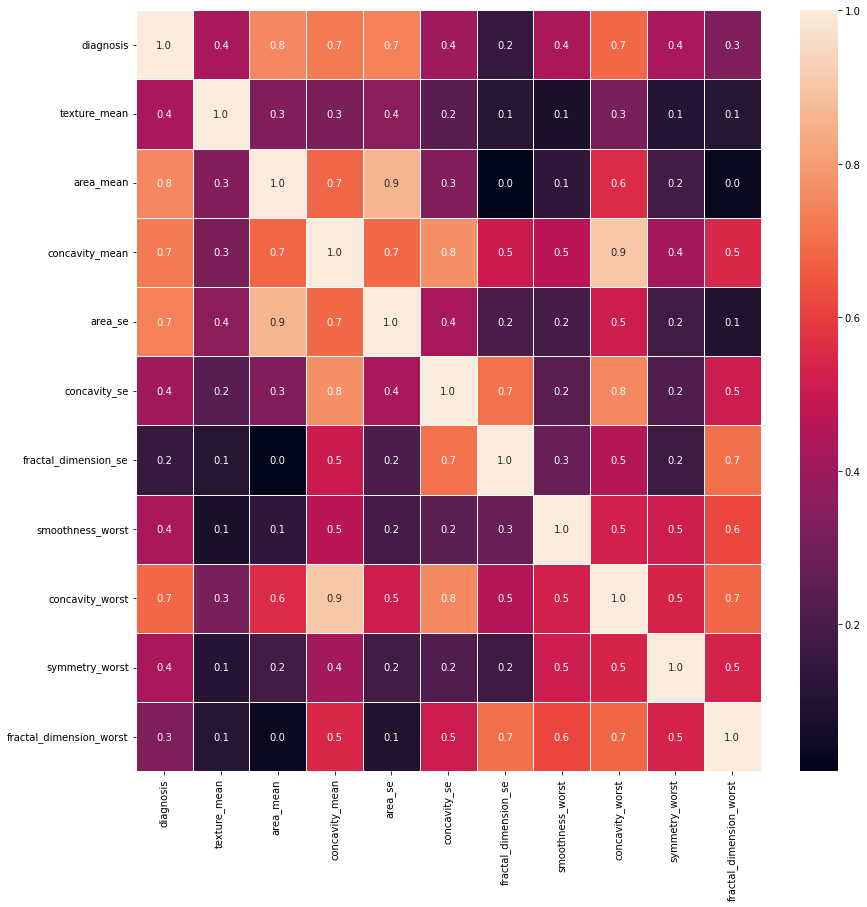

In [34]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

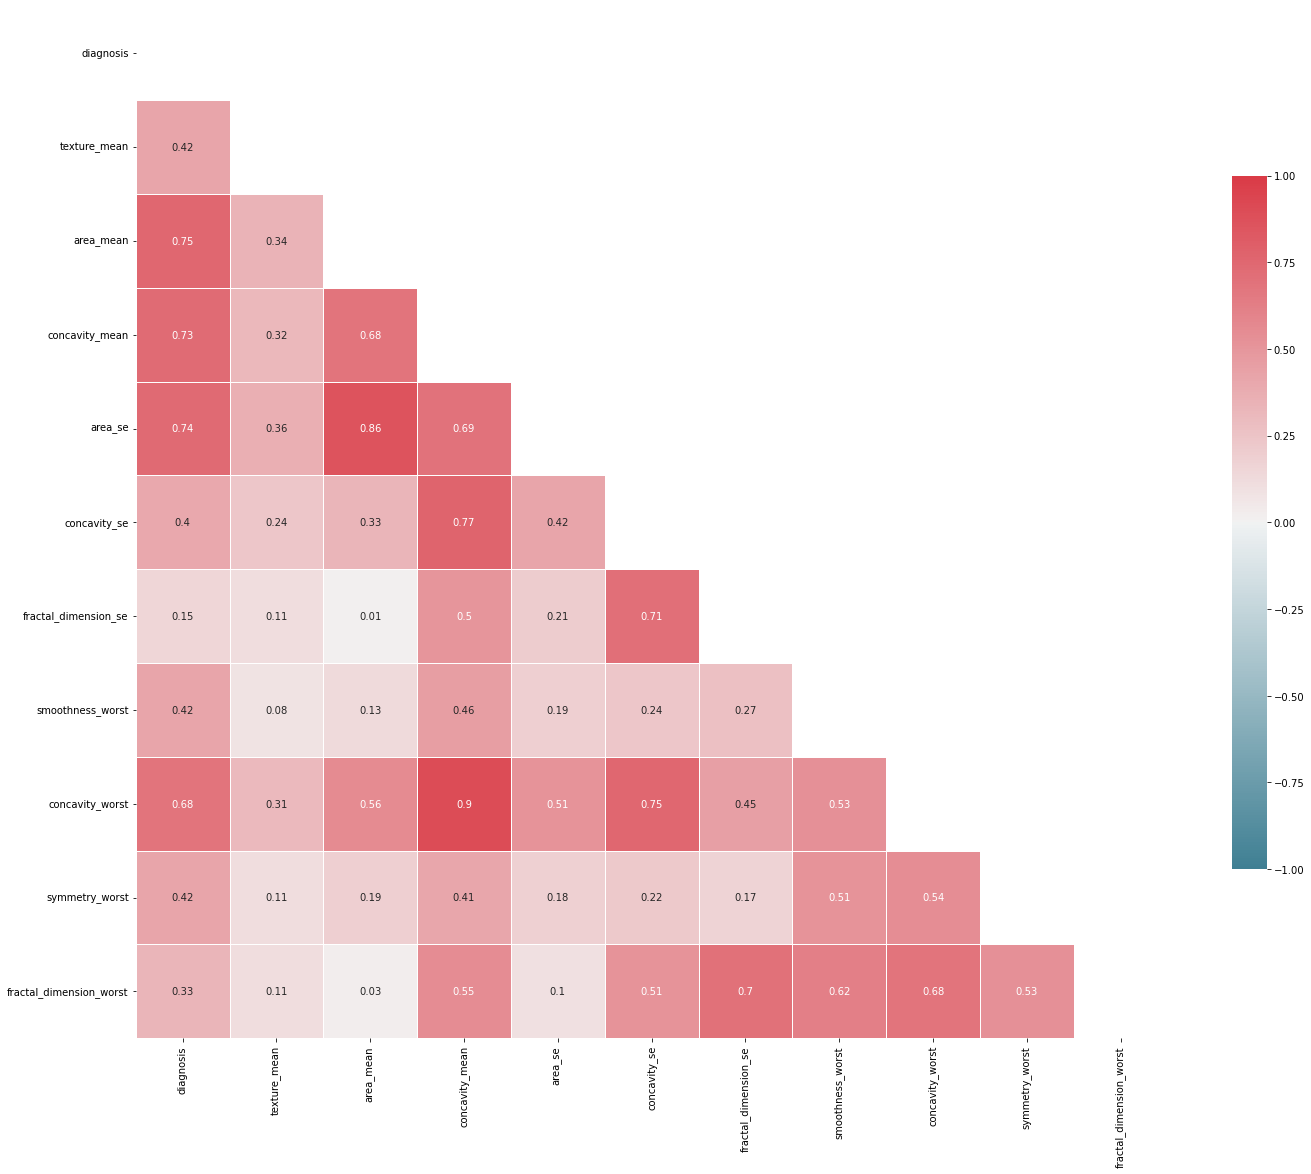

In [35]:
# Draw the heatmap again, with the new correlation matrix
corr = df1.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

# Separating the features and target

In [36]:
# split the dataset into dependent(X) and Independent(Y) datasets
X=df1.drop(['diagnosis'],axis=1)
y = df1['diagnosis']

In [37]:
print(X)

     texture_mean  area_mean  concavity_mean  area_se  concavity_se  \
0           10.38     1001.0         0.28241    86.20       0.05373   
1           17.77     1326.0         0.08690    74.08       0.01860   
2           21.25     1203.0         0.19740    86.20       0.03832   
3           20.38      386.1         0.24140    27.23       0.05661   
4           14.34     1297.0         0.19800    86.20       0.05688   
..            ...        ...             ...      ...           ...   
564         22.39     1326.3         0.24390    86.20       0.05198   
565         28.25     1261.0         0.14400    86.20       0.03950   
566         28.08      858.1         0.09251    48.55       0.04730   
567         29.33     1265.0         0.28241    86.20       0.07117   
568         24.54      181.0         0.00000    19.15       0.00000   

     fractal_dimension_se  smoothness_worst  concavity_worst  symmetry_worst  \
0                0.006193           0.16220           0.7119       

In [38]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


# Splitting the data into training data & testing data

In [39]:
# spliting the data into trainning and test dateset
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Handling Imbalanced Dataset

# Class distribution

<AxesSubplot:ylabel='diagnosis'>

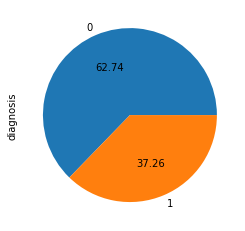

In [40]:
# Show pie plot
y.value_counts().plot.pie(autopct='%.2f')

# Cross Validation Like KFOLD

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [42]:
10.0 **np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [43]:
log_class=LogisticRegression()
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [44]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [45]:
y_pred=clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[105   3]
 [  3  60]]
0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       108
           1       0.95      0.95      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [46]:
class_weight=dict({0:1,1:100})

In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [48]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[108   0]
 [  6  57]]
0.9649122807017544
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       108
           1       1.00      0.90      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



# Under Sampling

In [49]:
from collections import Counter
Counter(y_train)

Counter({0: 249, 1: 149})

In [50]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 249, 1: 149})
The number of classes after fit Counter({0: 186, 1: 149})


In [51]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [52]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[105   3]
 [  4  59]]
0.9590643274853801
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



# Over Sampling

In [53]:
from imblearn.over_sampling import RandomOverSampler

In [54]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 249, 1: 149})
The number of classes after fit Counter({0: 249, 1: 186})


In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [56]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[104   4]
 [  4  59]]
0.9532163742690059
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



# SMOTETomek

In [57]:
from imblearn.combine import SMOTETomek

In [58]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 249, 1: 149})
The number of classes after fit Counter({0: 235, 1: 172})


In [59]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [60]:
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[107   1]
 [  1  62]]
0.9883040935672515
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



<AxesSubplot:ylabel='diagnosis'>

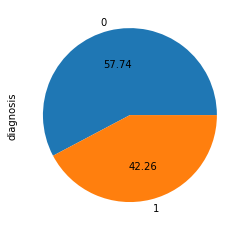

In [61]:
# Show pie plot
y_train_ns.value_counts().plot.pie(autopct='%.2f')

# Feature scaling

In [62]:
# feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# Predictive Modeling

# Model Building

# Classification Algorithm

# 1. Non-linear Models:

# Decision Tree Classifier

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train_ns,y_train_ns)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)
accuracy_score(y_test,prediction2)

0.9707602339181286

In [64]:
print('Confusion matrix :\n', cm2)

Confusion matrix :
 [[105   3]
 [  2  61]]


In [65]:
print(classification_report(y_test,prediction2))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



<AxesSubplot:>

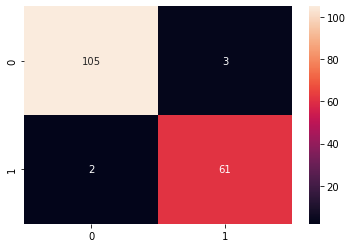

In [66]:

sns.heatmap(cm2,annot=True,fmt="d")

# Random forest classifier

Accuracy is:  0.9707602339181286
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Confusion matrix :
 [[105   3]
 [  2  61]]


<AxesSubplot:>

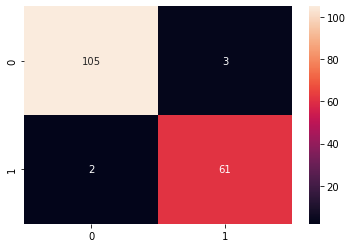

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

 
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train_ns,y_train_ns)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
print(classification_report(y_test,clf_rf.predict(X_test)))
print('Confusion matrix :\n', cm)
sns.heatmap(cm,annot=True,fmt="d")

# Naïve Bayes

In [68]:
from sklearn.naive_bayes import GaussianNB
nclassifier = GaussianNB()
nclassifier.fit(X_train_ns, y_train_ns)

GaussianNB()

In [69]:
y_pred  =  nclassifier.predict(X_test)

Accuracy : 0.935672514619883
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       108
           1       0.91      0.92      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Confusion matrix :
 [[102   6]
 [  5  58]]


<AxesSubplot:>

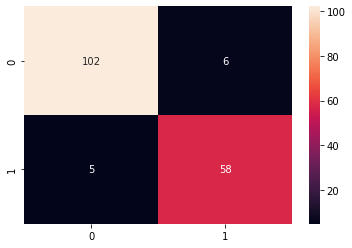

In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)
print('Accuracy :', ac)
print(classification_report(y_test,y_pred))
print('Confusion matrix :\n', cm)
sns.heatmap(cm,annot=True,fmt="d")

# K-Nearest Neighbours

Accuracy : 0.9064327485380117
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       108
           1       0.89      0.86      0.87        63

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

Confusion matrix :
 [[101   7]
 [  9  54]]


<AxesSubplot:>

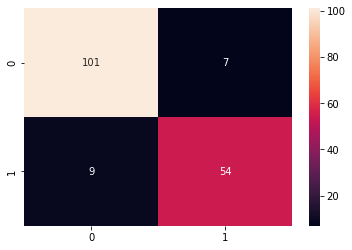

In [71]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
kclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
kclassifier.fit(X_train_ns, y_train_ns)

# Predicting the Test set results
y_pred = kclassifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print('Accuracy :', ac)
print(classification_report(y_test,y_pred))
print('Confusion matrix :\n', cm)
sns.heatmap(cm,annot=True,fmt="d")

# 2.Linear Models:

# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
rmodel = LogisticRegression()

In [73]:
# training the Logistic Regression model using Training data
rmodel.fit(X_train_ns, y_train_ns)

LogisticRegression()

In [74]:
# accuracy on training data
X_train_prediction = rmodel.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)

Accuracy on training data =  0.9170854271356784


Accuracy on test data =  0.9532163742690059
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       108
           1       0.92      0.95      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171

Confusion matrix :
 [[103   5]
 [  3  60]]


<AxesSubplot:>

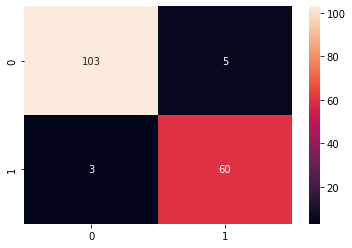

In [75]:
# accuracy on test data
X_test_prediction = rmodel.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy on test data = ', test_data_accuracy)
cm=confusion_matrix(y_test, X_test_prediction)
print(classification_report(y_test,X_test_prediction))
print('Confusion matrix :\n', cm)
sns.heatmap(cm,annot=True,fmt="d")

# Support Vector Machines(SVM)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       108
           1       0.98      0.81      0.89        63

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.91       171
weighted avg       0.93      0.92      0.92       171

Confusion matrix :
 [[107   1]
 [ 12  51]]
Accuracy : 0.9239766081871345


<AxesSubplot:>

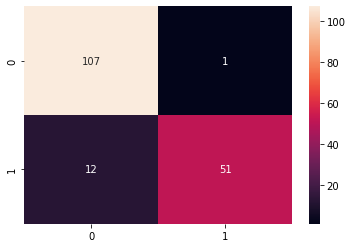

In [76]:
# training the kernel SVM model
from sklearn.svm import SVC 
svclassifier = SVC(kernel = 'rbf', random_state = 0) 
svclassifier.fit(X_train_ns, y_train_ns) 
# predicting the test set 
y_predict = svclassifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
con_matrx = confusion_matrix(y_test, y_predict)
print(classification_report(y_test,y_predict))
print('Confusion matrix :\n',con_matrx)
print('Accuracy :', accuracy_score(y_test, y_predict))
sns.heatmap(con_matrx,annot=True,fmt="d")

# Boosting algorithms

# LightGBM

In [77]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train_ns, y_train_ns)

LGBMClassifier()

In [78]:
# predict the results
y_pred=clf.predict(X_test)

In [79]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9766


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [80]:
y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9925


The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print(classification_report(y_test,y_pred))

Confusion matrix

 [[105   3]
 [  1  62]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# CatBoostClassifier

In [82]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
modelcat = CatBoostClassifier(iterations=50)
categorical_var = np.where(X_train.dtypes != np.float)[0]
modelcat.fit(X_train_ns,y_train_ns,cat_features = categorical_var,plot=False)
predict_train = modelcat.predict(X_train)
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

Learning rate set to 0.109465
0:	learn: 0.6389378	total: 241ms	remaining: 11.8s
1:	learn: 0.5910173	total: 252ms	remaining: 6.05s
2:	learn: 0.5427538	total: 263ms	remaining: 4.12s
3:	learn: 0.5037283	total: 274ms	remaining: 3.15s
4:	learn: 0.4670623	total: 285ms	remaining: 2.56s
5:	learn: 0.4377450	total: 294ms	remaining: 2.16s
6:	learn: 0.4081971	total: 304ms	remaining: 1.87s
7:	learn: 0.3824813	total: 311ms	remaining: 1.63s
8:	learn: 0.3624421	total: 317ms	remaining: 1.45s
9:	learn: 0.3429690	total: 323ms	remaining: 1.29s
10:	learn: 0.3248348	total: 329ms	remaining: 1.17s
11:	learn: 0.3074991	total: 335ms	remaining: 1.06s
12:	learn: 0.2911255	total: 339ms	remaining: 964ms
13:	learn: 0.2773598	total: 343ms	remaining: 882ms
14:	learn: 0.2640752	total: 347ms	remaining: 810ms
15:	learn: 0.2525228	total: 351ms	remaining: 746ms
16:	learn: 0.2413125	total: 355ms	remaining: 689ms
17:	learn: 0.2312249	total: 359ms	remaining: 639ms
18:	learn: 0.2219583	total: 363ms	remaining: 593ms
19:	learn: 

In [83]:
predict_test = modelcat.predict(X_test)
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


accuracy_score on test dataset :  0.9707602339181286


In [84]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict_test)
print('Confusion matrix\n\n', cm)
print(classification_report(y_test,predict_test))

Confusion matrix

 [[104   4]
 [  1  62]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.94      0.98      0.96        63

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# GradientBoostingClassifier

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train_ns, y_train_ns)
predictions = gb_clf.predict(X_test)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (test): {0:.3f}".format(gb_clf.score(X_test, y_test)))

Accuracy score (training): 0.990
Accuracy score (test): 0.965


In [86]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

Confusion Matrix:
[[104   4]
 [  2  61]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



# Prediction using Random forest classifier

In [89]:
input_data = (10.38,1001,0.3001,153.4,0.05373,0.006193,0.1622,0.7119,0.4601,0.1189)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf_rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[1]
The Breast cancer is Malignant


In [90]:
input_data = (14.36,566.3,0.06664,23.56,0.02387,0.0023,0.144,0.239,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = clf_rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[0]
The Breast Cancer is Benign


# Prediction using GradientBoostingClassifier

In [91]:
input_data = (10.38,1001,0.3001,153.4,0.05373,0.006193,0.1622,0.7119,0.4601,0.1189)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = gb_clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[1]
The Breast cancer is Malignant


In [92]:
input_data = (14.36,566.3,0.06664,23.56,0.02387,0.0023,0.144,0.239,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = gb_clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[0]
The Breast Cancer is Benign


# Prediction using Logistic Regression

In [93]:
input_data = (14.36,566.3,0.06664,23.56,0.02387,0.0023,0.144,0.239,0.2977,0.07259)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rmodel.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[0]
The Breast Cancer is Benign


In [97]:
input_data = (10.38,1001,0.3001,153.4,0.05373,0.006193,0.1622,0.7119,0.4601,0.1189)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rmodel.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[1]
The Breast cancer is Malignant


In [98]:
import pickle 

In [99]:
pickle.dump(gb_clf, open('model.pkl','wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

With the Gradient  BoostingClassifier , we achieve the highest precision, recall, and f1-score. As a result, we chose the random forest classifier.